In [0]:
import numpy as np
import pandas as pd
from fastai.vision import * 
from fastai.metrics import error_rate
import torch.nn as nn

In [0]:
path=untar_data(URLs.CIFAR)

In [0]:
path

PosixPath('/root/.fastai/data/cifar10')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/models')]

In [0]:
path_train=path/'train'
path_label=path/'labels.txt'

In [0]:
path_label

PosixPath('/root/.fastai/data/cifar10/labels.txt')

In [0]:
f = open(path_label,mode='r')
print(f.read())

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck



In [0]:
fnames1=get_image_files(path_train)
fnames1[:5]

[]

In [0]:
bs=64

In [0]:
tfms=get_transforms(max_rotate=30,max_zoom=1.1,max_warp=0.26)

In [0]:
src=ImageList.from_folder(path).split_by_rand_pct(valid_pct=0.2,seed=45).label_from_folder()

In [0]:
data1=src.transform(tfms=tfms).databunch(bs=bs).normalize()

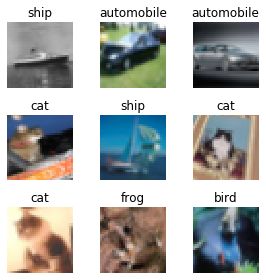

In [0]:
data1.show_batch(rows=3,figsize=(4,4))

In [0]:
data1.batch_stats

<bound method ImageDataBunch.batch_stats of ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
dog,dog,dog,dog,dog
Path: /root/.fastai/data/cifar10;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
frog,frog,bird,horse,automobile
Path: /root/.fastai/data/cifar10;

Test: None>

In [0]:
data1.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [0]:
help(res_block)

Help on function res_block in module fastai.layers:

res_block(nf, dense:bool=False, norm_type:Union[fastai.layers.NormType, NoneType]=<NormType.Batch: 1>, bottle:bool=False, **conv_kwargs)
    Resnet block of `nf` features. `conv_kwargs` are passed to `conv_layer`.



In [0]:
doc(res_block)

In [0]:
doc(conv_layer)

In [0]:
def conv2(ni,nf):
  return nn.Sequential(nn.Conv2d(ni,nf,kernel_size=3,stride=2,padding=1),nn.ReLU(),nn.BatchNorm2d(nf))

In [0]:
def conv21(ni,nf): return conv_layer(ni,nf,stride=2)

In [0]:
class Resblock(nn.Module):
  def __init__(self,nf):
    super().__init__()
    self.conve1=conv2(nf,nf)
    self.conve2=conv2(nf,nf)
  def forward(self,x):
    return x+self.conve2(self.conve1(x))


In [0]:
class model_CIFAR10(nn.Module):
  def __init__(self):
    super(model_CIFAR10,self).__init__()
    self.Res1=res_block(3)
    self.con1=conv21(3,8)
    self.Res2=res_block(8)
    self.con2=conv21(8,16)
    self.Res3=res_block(16)
    self.con3=conv21(16,48)
    self.Res4=res_block(48)
    self.con4=conv21(48,24)
    self.Res5=res_block(24)
    self.con5=conv21(24,10)
    self.Flat=Flatten()
  def forward(self,x):
    return self.Flat(self.con5(self.Res5(self.con4(self.Res4(self.con3(self.Res3(self.con2(self.Res2(self.con1(self.Res1(x)))))))))))





In [0]:
model=nn.Sequential(
   res_block(3),
   conv21(3,8),
   res_block(8),
   conv21(8,16),
   res_block(16),
   conv21(16,48),
   res_block(48),
   conv21(48,24),
   res_block(24),
   conv21(24,10),
   Flatten()

)

In [0]:
learn = Learner(data1, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [0]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [3, 32, 32]          81         True      
______________________________________________________________________
ReLU                 [3, 32, 32]          0          False     
______________________________________________________________________
BatchNorm2d          [3, 32, 32]          6          True      
______________________________________________________________________
Conv2d               [3, 32, 32]          81         True      
______________________________________________________________________
ReLU                 [3, 32, 32]          0          False     
______________________________________________________________________
BatchNorm2d          [3, 32, 32]          6          True      
______________________________________________________________________
MergeLayer           [3, 32, 32]          0          False     
___________________________________________________

In [0]:
learn.lr_find(end_lr=100)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


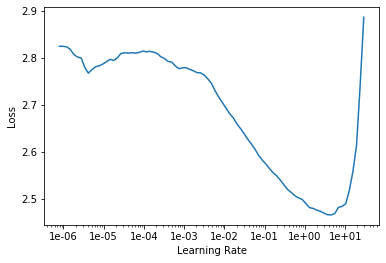

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3,max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.657751,1.833211,0.377750,01:38
1,1.420383,1.278013,0.535583,01:38
2,1.266825,1.106426,0.607583,01:38


In [0]:
learn.fit_one_cycle(10,max_lr=0.05s)

epoch,train_loss,valid_loss,accuracy,time
0,1.228807,1.087659,0.612333,01:38
1,1.294088,1.132342,0.596833,01:39
2,1.259467,1.526497,0.488083,01:39
3,1.237116,1.065682,0.616500,01:39
4,1.149444,1.158337,0.596917,01:39
5,1.100082,0.983434,0.662750,01:39
6,1.026573,0.891670,0.687333,01:39
7,0.959388,0.835251,0.707250,01:39
8,0.925062,0.789910,0.726167,01:39
9,0.906453,0.768484,0.730583,01:39
